In [2]:
# imports
import imaids
import os
import sys
import time
import traceback
import numpy
import json
import numpy as np
import radia as _rad
from copy import deepcopy
from matplotlib import pyplot as plt

### Check block shape

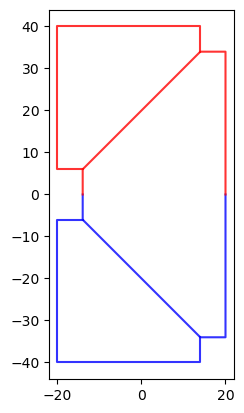

In [3]:
shape = [
    [[-14, -6], [-20, -6], [-20, -40], [14, -40], [14, -34]],
    [[-14, 0], [-14, -6], [14, -34], [20, -34], [20, 0]]
    ]

shape_flip = np.array(shape)
shape_flip[:,:,1] = shape_flip[:,:,1]*(-1)-40
shape_flip = shape_flip.tolist()

subdivision = [[3, 3, 2], [3, 3, 2]]

shape_plot = np.array(shape)
shape_flip_plot = np.array(shape_flip)

plt.plot(shape_plot[0,:,0], shape_plot[0,:,1], c='blue', alpha=0.8)
plt.plot(shape_plot[1,:,0], shape_plot[1,:,1], c='blue', alpha=0.8)

plt.plot(shape_flip_plot[0,:,0], shape_flip_plot[0,:,1]+40, 'red', alpha=0.8)
plt.plot(shape_flip_plot[1,:,0], shape_flip_plot[1,:,1]+40, 'red', alpha=0.8)

plt.gca().set_aspect(1)

### Check APU definition including magnetization list

In [4]:
mr = 1.25

start_blocks_length = [3.075, 3.075, 3.075, 3.075, 3.075, 3.075, 12.3]
start_blocks_distance = [6, 0, 2.9, 1, 0, 0.2, 0.2]
start_blocks_magnetization = [[0,mr,0], [0,0,-mr], [0,0,-mr], [0,-mr,0], [0,-mr,0], [0,-mr,0], [0,0,mr]]

end_blocks_length = [3.075, 3.075, 3.075, 3.075, 3.075, 3.075]
end_blocks_distance = [0.2, 0, 1, 2.9, 0, 6]
end_blocks_magnetization = [[0,mr,0], [0,mr,0], [0,mr,0], [0,0,-mr], [0,0,-mr], [0,-mr,0]]

mags = [[0,mr,0], [0,0,-mr], [0,0,-mr], [0,-mr,0], [0,-mr,0], [0,-mr,0], [0,0,mr],
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #1
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #2
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #3
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #4
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #5
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #6
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #7
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #8
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #9
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #10
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #11
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #12
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #13
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #14
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #15
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #16
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #17
        [0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr], #18
        [0,mr,0], [0,mr,0], [0,mr,0], [0,0,-mr], [0,0,-mr], [0,-mr,0]]

magnetization_dict = {'cs': mags, 'ci': mags}

papu1 = imaids.models.APU(cs_block_shape=shape_flip,
                        ci_block_shape=shape,
                        mr=1.25, gap=7.5, nr_periods=18, period_length=50,
                        block_shape=shape, block_subdivision=subdivision,
                        longitudinal_distance=0.2,
                        start_blocks_length=start_blocks_length,
                        start_blocks_distance=start_blocks_distance,
                        start_blocks_magnetization=start_blocks_magnetization,
                        end_blocks_length=end_blocks_length,
                        end_blocks_distance=end_blocks_distance,
                        end_blocks_magnetization=end_blocks_magnetization
                        )
papu1.create_radia_object(magnetization_dict=magnetization_dict)

In [6]:
mr = 1.25
gap = 7.5
nr_periods = 18
period_length = 50
longitudinal_distance = 0.2

start_blocks_length = [3.075, 3.075, 3.075, 3.075, 3.075, 3.075, 12.3]
start_blocks_distance = [6, 0, 2.9, 1, 0, 0.2, 0.2]
start_blocks_magnetization = [[0,mr,0], [0,0,-mr], [0,0,-mr], [0,-mr,0], [0,-mr,0], [0,-mr,0], [0,0,mr]]

end_blocks_length = [3.075, 3.075, 3.075, 3.075, 3.075, 3.075]
end_blocks_distance = [0.2, 0, 1, 2.9, 0, 6]
end_blocks_magnetization = [[0,mr,0], [0,mr,0], [0,mr,0], [0,0,-mr], [0,0,-mr], [0,-mr,0]]

mags = (start_blocks_magnetization
        + 18*[[0,mr,0], [0,0,-mr], [0,-mr,0], [0,0,mr]]
        + end_blocks_magnetization)
magnetization_dict = {'cs': mags, 'ci': mags}

papu2 = imaids.models.APU(cs_block_shape=shape_flip, ci_block_shape=shape, mr=mr,
                          gap=gap, nr_periods=nr_periods, period_length=period_length,
                          block_subdivision=subdivision,
                          longitudinal_distance=longitudinal_distance,
                          start_blocks_length=start_blocks_length,
                          start_blocks_distance=start_blocks_distance,
                          end_blocks_length=end_blocks_length,
                          end_blocks_distance=end_blocks_distance,
                          init_radia_object=False
                        )
papu2.create_radia_object(magnetization_dict=magnetization_dict)

In [5]:
print(np.abs(np.array(papu1.cassettes['ci'].magnetization_list)
           - np.array(papu2.cassettes['ci'].magnetization_list)).sum(axis=0))
print(np.abs(np.array(papu1.cassettes['cs'].magnetization_list)
           - np.array(papu2.cassettes['cs'].magnetization_list)).sum(axis=0))


[0. 0. 0.]
[0. 0. 0.]


In [6]:
papu1.draw()
papu2.draw()

True

In [7]:
papu = papu2

### Calculations

In [8]:
xmin, xmax, xnpts = -10, 10, 21
zmin, zmax, znpts = -700, 700, 2801
x = np.linspace(xmin, xmax, xnpts)
z = np.linspace(zmin, zmax, znpts)

energy = 3
rkstep = 0.5
skip_poles = 4

In [11]:
papu.set_cassete_positions(dp=25)

t1 = time.time()
papu.solve()
print('> solve() took: {:.3f} seconds'.format(time.time()-t1))

> solve() took: 51.283 seconds


Bx amplitude [T]:  1.350835905138697e-05
By amplitude [T]:  1.3064759928224732


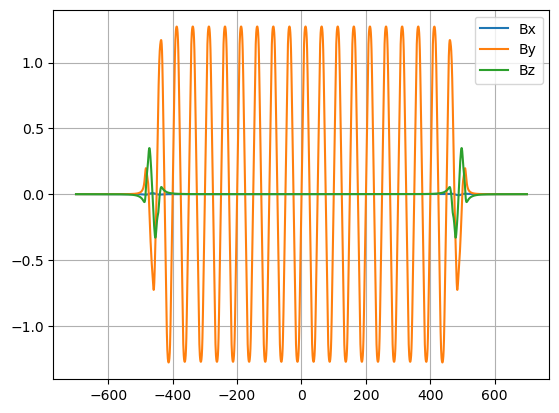

In [12]:
# field

b = papu.get_field(x=0,y=0,z=z)

plt.plot(z, b[:,0], label='Bx')
plt.plot(z, b[:,1], label='By')
plt.plot(z, b[:,2], label='Bz')
plt.legend()
plt.grid()

# amplitude

bxamp, byamp, _, _ = papu.calc_field_amplitude()

print('Bx amplitude [T]: ', bxamp)
print('By amplitude [T]: ', byamp)

IBx [G.cm]:  0.001490731597048989
IBy [G.cm]:  66.0635265692208
IBz [G.cm]:  4.7759047278826
IIBx [kG.cm²]:  0.03365340646577046
IIBy [kG.cm²]:  4.543070222022753
IIBz [kG.cm²]:  0.26600004679713785


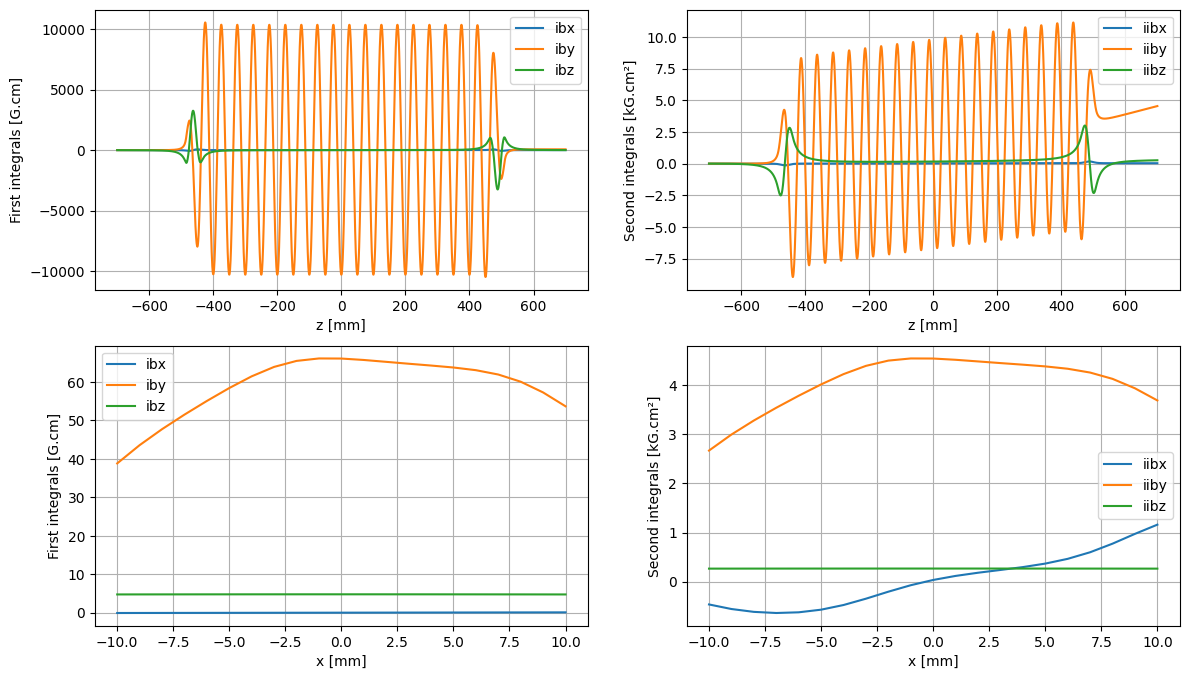

In [11]:
# Integrals

ibx = []
iby = []
ibz = []
iibx = []
iiby = []
iibz = []

ib, iib = papu.calc_field_integrals(z_list=z, x=0, y=0)

ibx0 = ib[:, 0]
iby0 = ib[:, 1]
ibz0 = ib[:, 2]
iibx0 = iib[:, 0]
iiby0 = iib[:, 1]
iibz0 = iib[:, 2]

for xp in x:
    field = papu.get_field(x=xp, y=0, z=z)
    ib, iib = papu.calc_field_integrals(z_list=z, x=xp, y=0, field_list=field)
    ibx.append(ib[-1,0])
    iby.append(ib[-1,1])
    ibz.append(ib[-1,2])
    iibx.append(iib[-1,0])
    iiby.append(iib[-1,1])
    iibz.append(iib[-1,2])

fig, ax = plt.subplots(2, 2, figsize=(14, 8))

ax[0,0].plot(z, ibx0, label='ibx')
ax[0,0].plot(z, iby0, label='iby')
ax[0,0].plot(z, ibz0, label='ibz')
ax[0,0].set_ylabel('First integrals [G.cm]')
ax[0,0].set_xlabel('z [mm]')
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].plot(z, iibx0, label='iibx')
ax[0,1].plot(z, iiby0, label='iiby')
ax[0,1].plot(z, iibz0, label='iibz')
ax[0,1].set_ylabel('Second integrals [kG.cm²]')
ax[0,1].set_xlabel('z [mm]')
ax[0,1].legend()
ax[0,1].grid()

ax[1,0].plot(x, ibx, label='ibx')
ax[1,0].plot(x, iby, label='iby')
ax[1,0].plot(x, ibz, label='ibz')
ax[1,0].set_ylabel('First integrals [G.cm]')
ax[1,0].set_xlabel('x [mm]')
ax[1,0].legend() 
ax[1,0].grid()

ax[1,1].plot(x, iibx, label='iibx')
ax[1,1].plot(x, iiby, label='iiby')
ax[1,1].plot(x, iibz, label='iibz')
ax[1,1].set_ylabel('Second integrals [kG.cm²]')
ax[1,1].set_xlabel('x [mm]')
ax[1,1].legend()
ax[1,1].grid()


print('IBx [G.cm]: ', ibx0[-1])
print('IBy [G.cm]: ', iby0[-1])
print('IBz [G.cm]: ', ibz0[-1])
print('IIBx [kG.cm²]: ', iibx0[-1])
print('IIBy [kG.cm²]: ', iiby0[-1])
print('IIBz [kG.cm²]: ', iibz0[-1])

[10.62621421  7.5869029   5.37097406  3.7553643   2.57746526  1.72091851
  1.1008636   0.65377444  0.33492671  0.11985343  0.         -0.02610092
  0.04217209  0.20680682  0.4715801   0.84204504  1.3246085   1.92481636
  2.64708048  3.50167967  4.51952772]


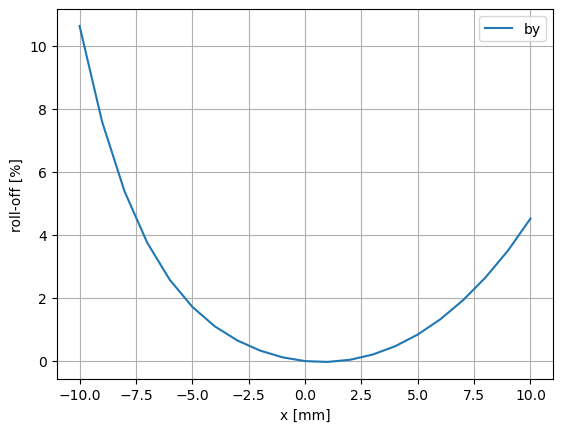

In [15]:
# roll-off

# roll_off = papu.calc_roll_off_amplitude(z, x)
print(roll_off[1, :]*100)
#plt.plot(roll_off[0, :]*100, label='bx')
plt.plot(x, roll_off[1, :]*100, label='by')
#plt.plot(roll_off[2, :]*100, label='bz')
plt.ylabel('roll-off [%]')
plt.xlabel('x [mm]')
plt.legend()
plt.grid()

Phase error [°]:  -0.19333375299165115


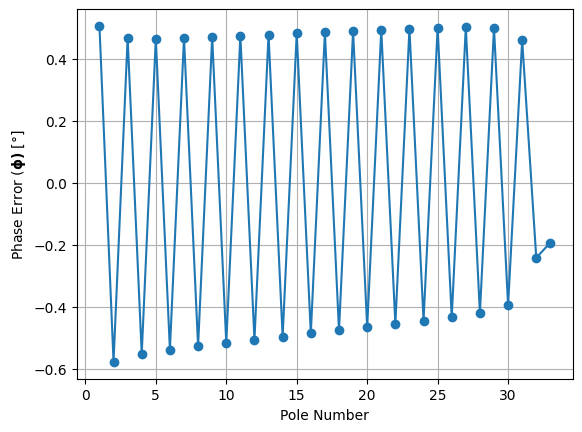

In [13]:
# phase error

traj = papu.calc_trajectory(energy, [0, 0, z[0], 0, 0, 1], z[-1], rkstep)
kh, kv = papu.calc_deflection_parameter(bxamp, byamp)
zpe, pe, perms = papu.calc_phase_error(
    energy, traj, bxamp, byamp, skip_poles=skip_poles)

pe *= 180/np.pi
perms *= 180/np.pi

poles = list(range(1, len(pe)+1))

plt.plot(poles, pe, '-o')
plt.ylabel(r'Phase Error ($\mathbf{\phi)}$ [°]')
plt.xlabel('Pole Number')
plt.grid()

print('Phase error [°]: ', pe[-1])